In [1]:
# Installa le librerie necessarie
!pip install transformers torch

# Importa il modello e il tokenizer BERT base da Hugging Face
from transformers import BertModel, BertTokenizer
import torch
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importa i moduli per clustering e riduzione dimensionale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ======================================================================
# BLOCCO 1: Caricamento del modello BERT base (non fine-tuned)
# ======================================================================
# Carica il modello BERT base e il tokenizer
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Macro‐cluster counts:
  Cluster 0 (no-jailbreak): 331 elementi
  Cluster 1 (jailbreak): 1442 elementi


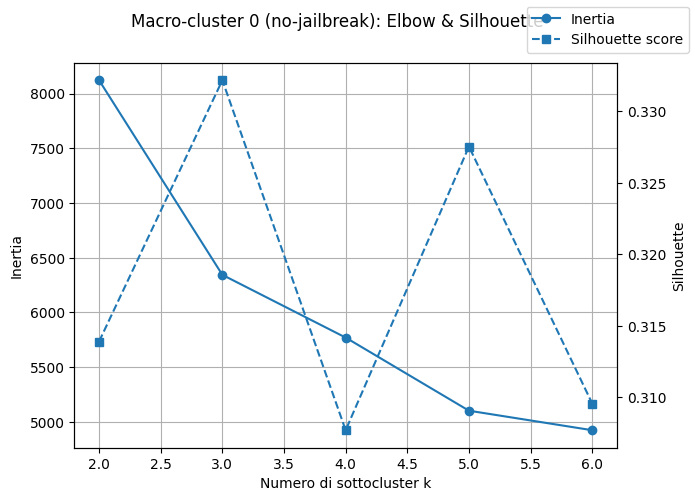

Macro‐cluster 0 (no-jailbreak): k ottimale = 3 (silhouette 0.332)


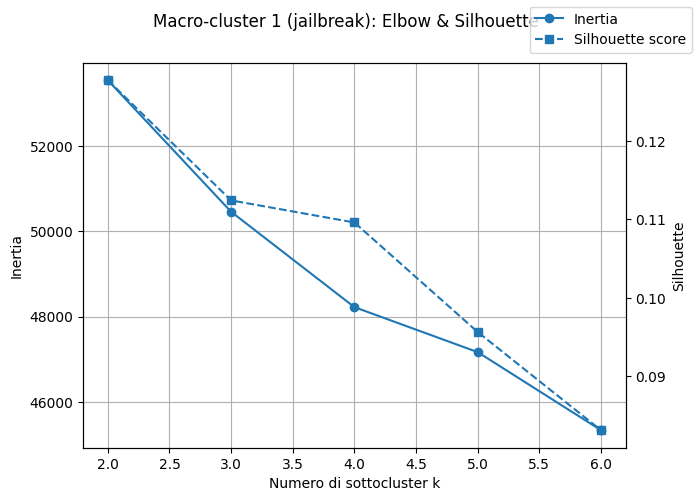

Macro‐cluster 1 (jailbreak): k ottimale = 2 (silhouette 0.128)

== Visualizzazione macro‐cluster con PCA ==


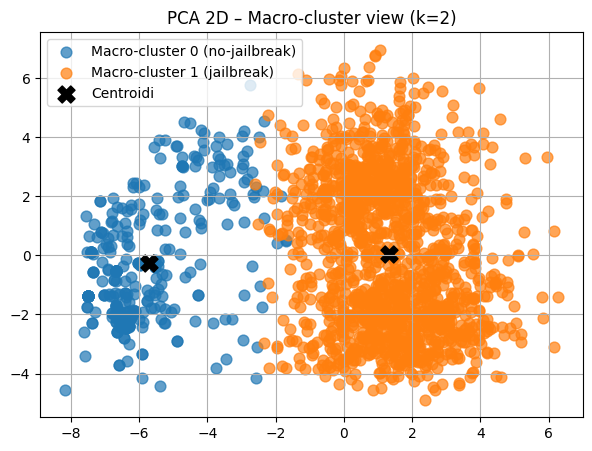


== Visualizzazione macro‐cluster con t-SNE ==


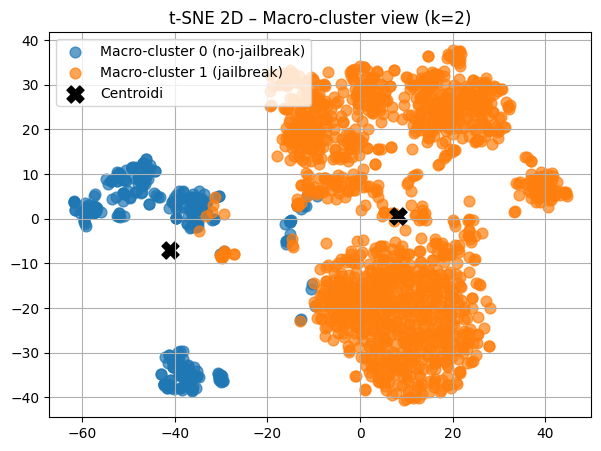


== Visualizzazione macro‐cluster con UMAP ==


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


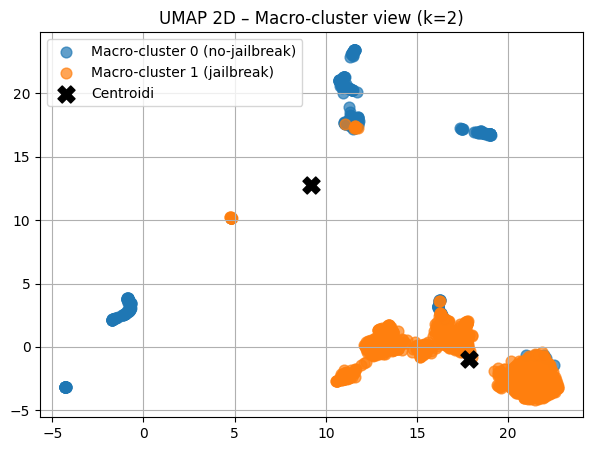


== Visualizzazione globale con sottocluster via PCA ==


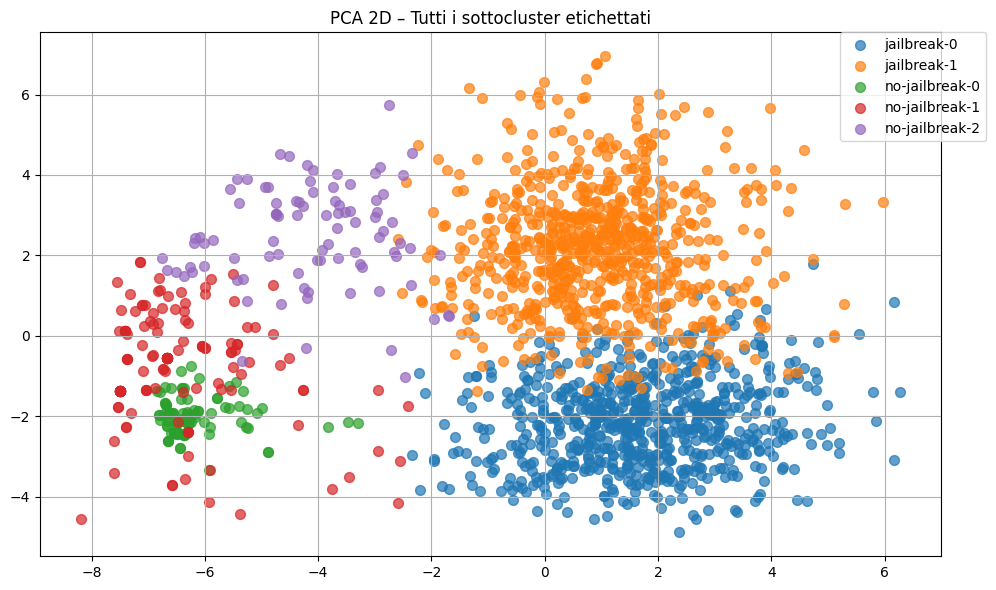


== Visualizzazione globale con sottocluster via t-SNE ==


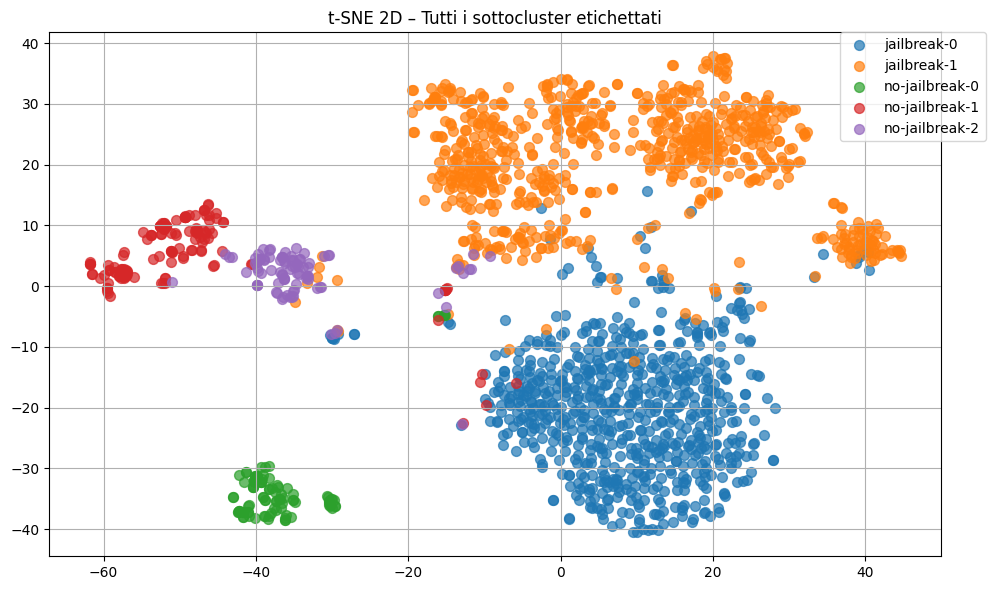


== Visualizzazione globale con sottocluster via UMAP ==


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


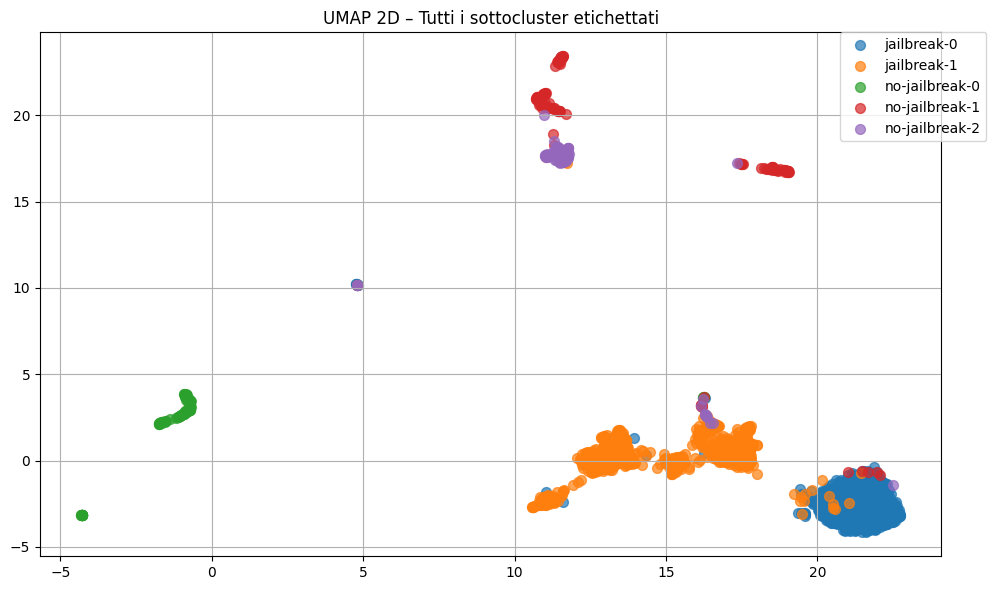


--- Visualizzo sottocluster di macro‐cluster 0 (no-jailbreak) ---


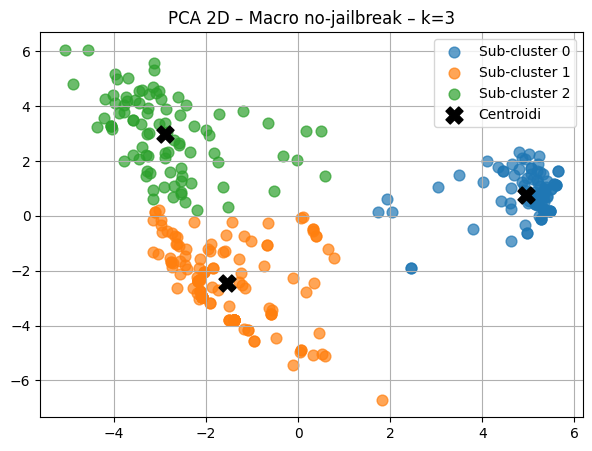

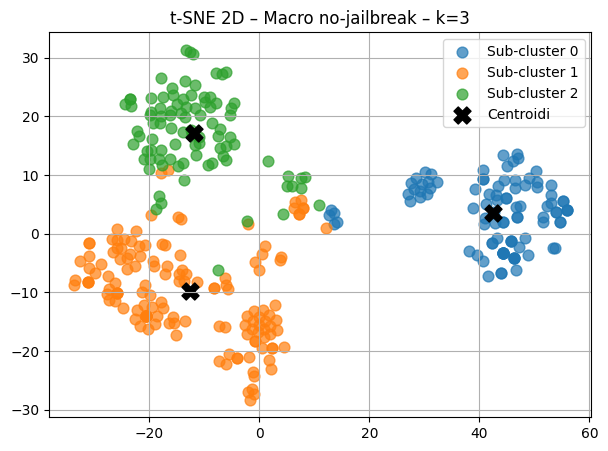

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


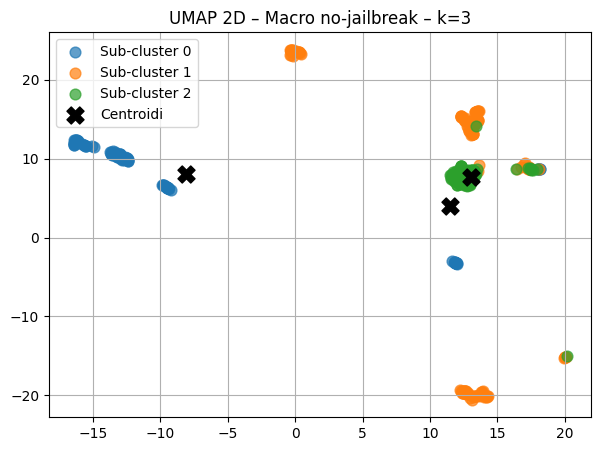


--- Visualizzo sottocluster di macro‐cluster 1 (jailbreak) ---


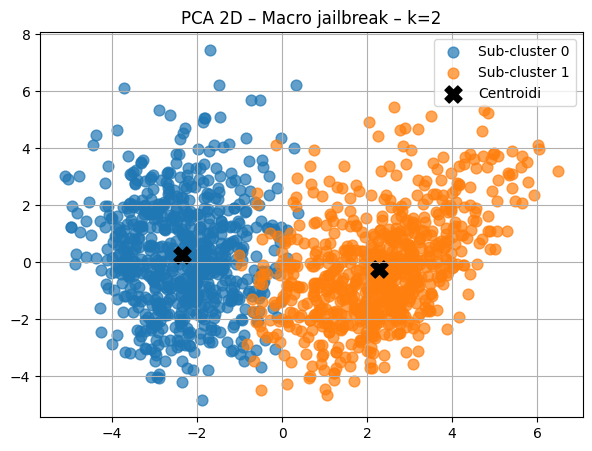

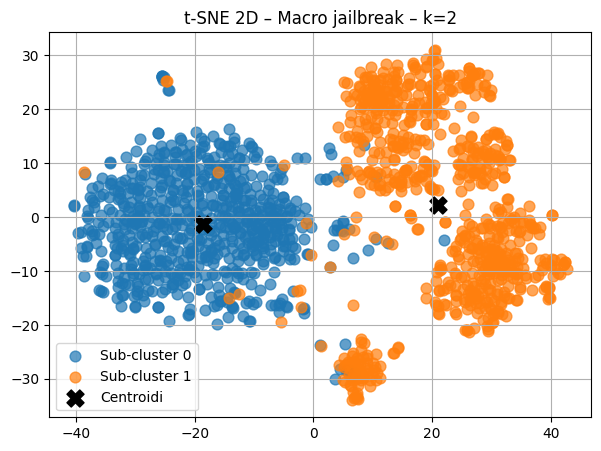

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


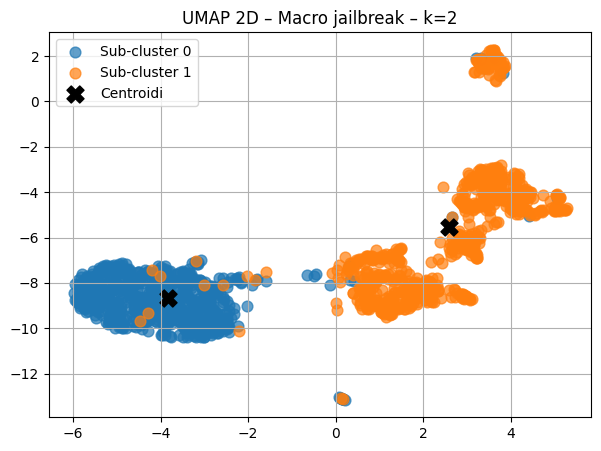

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# ======================================================================
# BLOCCO 0: Caricamento embedding (invariato)
# ======================================================================
with open("response.json", "r") as f:
    responses = json.load(f)

embedding_list = []
for item in responses:
    text = item.get("response", "")
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs, output_hidden_states=True)
    emb = outputs.hidden_states[-1][:, 0, :].squeeze(0).detach().cpu().numpy()
    embedding_list.append(emb)

X = np.array(embedding_list)

# ======================================================================
# BLOCCO A: Primo livello di clustering (k=2)
# ======================================================================
km_lvl1 = KMeans(n_clusters=2, random_state=42).fit(X)
labels_lvl1 = km_lvl1.labels_

# Mappatura cluster → macro‐classe
# (dopo aver ispezionato manualmente alcuni esempi)
# 0 → no-jailbreak, 1 → jailbreak
macro_label_map = {0: "no-jailbreak", 1: "jailbreak"}
macro_labels = np.vectorize(macro_label_map.get)(labels_lvl1)

print("Macro‐cluster counts:")
for cl in [0, 1]:
    cnt = np.sum(labels_lvl1 == cl)
    print(f"  Cluster {cl} ({macro_label_map[cl]}): {cnt} elementi")

# ======================================================================
# BLOCCO B: Sotto‐clustering gerarchico su ciascun macro‐cluster
# ======================================================================
hierarchy_results = {}

for macro_cl in [0, 1]:
    # Estrai sottoinsieme di embedding
    mask = (labels_lvl1 == macro_cl)
    X_sub = X[mask]

    # Selezione k ottimale tramite Elbow e Silhouette (su X_sub)
    ks = range(2, 7)
    inertias, sil_scores = [], []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=42).fit(X_sub)
        inertias.append(km.inertia_)
        sil_scores.append(silhouette_score(X_sub, km.labels_))

    # Plot Elbow & Silhouette per il sottoinsieme
    fig, ax1 = plt.subplots(figsize=(7,5))
    ax1.plot(ks, inertias, 'o-', label='Inertia')
    ax1.set_xlabel('Numero di sottocluster k')
    ax1.set_ylabel('Inertia')
    ax2 = ax1.twinx()
    ax2.plot(ks, sil_scores, 's--', label='Silhouette score')
    ax2.set_ylabel('Silhouette')
    fig.suptitle(f"Macro‐cluster {macro_cl} ({macro_label_map[macro_cl]}): Elbow & Silhouette")
    ax1.grid(True)
    fig.legend(loc='upper right')
    plt.show()

    # Scegli il k che massimizza la silhouette
    best_k = ks[np.argmax(sil_scores)]
    print(f"Macro‐cluster {macro_cl} ({macro_label_map[macro_cl]}): k ottimale = {best_k} (silhouette {max(sil_scores):.3f})")

    # Clustering finale sul sottoinsieme
    km_final = KMeans(n_clusters=best_k, random_state=42).fit(X_sub)
    labels_sub = km_final.labels_

    # Salvo risultati nel dizionario
    hierarchy_results[macro_cl] = {
        "best_k": best_k,
        "silhouette_scores": sil_scores,
        "inertia": inertias,
        "model": km_final,
        "labels": labels_sub,
        "mask": mask
    }
# ======================================================================
# BLOCCO BIS: Visualizzazione 2D dei due macro‐cluster principali
# ======================================================================
def plot_macro_clusters(X, labels_lvl1, technique="PCA"):
    if technique == "PCA":
        reducer = PCA(n_components=2, random_state=42)
    elif technique == "t-SNE":
        perp = min(30, X.shape[0] - 1)
        reducer = TSNE(n_components=2, perplexity=perp, random_state=42)
    else:  # UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)

    X2d = reducer.fit_transform(X)

    plt.figure(figsize=(7,5))
    for i in range(2):
        pts = X2d[labels_lvl1 == i]
        plt.scatter(pts[:,0], pts[:,1], label=f"Macro-cluster {i} ({macro_label_map[i]})", s=60, alpha=0.7)
    # Centroidi
    if technique == "PCA":
        cent2d = reducer.transform(km_lvl1.cluster_centers_)
    else:
        cent2d = np.array([X2d[labels_lvl1 == i].mean(axis=0) for i in range(2)])
    plt.scatter(cent2d[:,0], cent2d[:,1], marker='X', s=150, c='black', label='Centroidi')
    plt.title(f"{technique} 2D – Macro-cluster view (k=2)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Esegui con le tre tecniche
for tech in ["PCA", "t-SNE", "UMAP"]:
    print(f"\n== Visualizzazione macro‐cluster con {tech} ==")
    plot_macro_clusters(X, labels_lvl1, technique=tech)
    # ======================================================================
# BLOCCO C: Visualizzazione globale dei sottocluster su tutti i punti
# ======================================================================
def plot_all_subclusters(X, hierarchy_results, labels_lvl1, technique="PCA"):
    if technique == "PCA":
        reducer = PCA(n_components=2, random_state=42)
    elif technique == "t-SNE":
        perp = min(30, X.shape[0] - 1)
        reducer = TSNE(n_components=2, perplexity=perp, random_state=42)
    else:  # UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)

    X2d = reducer.fit_transform(X)
    plt.figure(figsize=(10, 6))

    # Array dei sottocluster a livello globale
    global_subcluster_labels = np.full(X.shape[0], fill_value=-1, dtype=object)

    for macro_cl, res in hierarchy_results.items():
        mask = res["mask"]                # bool array (dim: X)
        labels_sub = res["labels"]        # array piccolo (dim: X_sub)
        k = res["best_k"]

        # Costruisci etichette globali come stringhe tipo "jailbreak-1"
        for i, subcl in enumerate(labels_sub):
            idx = np.where(mask)[0][i]  # posizione globale nel dataset
            global_subcluster_labels[idx] = f"{macro_label_map[macro_cl]}-{subcl}"

    # Ora plottiamo: un colore diverso per ogni etichetta globale
    unique_labels = np.unique(global_subcluster_labels)
    for label in unique_labels:
        idx = (global_subcluster_labels == label)
        plt.scatter(X2d[idx, 0], X2d[idx, 1], label=label, s=50, alpha=0.7)

    plt.title(f"{technique} 2D – Tutti i sottocluster etichettati")
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Esegui con una o più tecniche:
for tech in ["PCA", "t-SNE", "UMAP"]:
    print(f"\n== Visualizzazione globale con sottocluster via {tech} ==")
    plot_all_subclusters(X, hierarchy_results, labels_lvl1, technique=tech)
# ======================================================================
# BLOCCO D: Visualizzazioni 2D dei sottocluster (opzionale)
# ======================================================================
def plot_subclusters(technique, X_full, labels_full, mask, labels_sub, model_sub, n_components=2):
    """Plotta i sottocluster estratti dal sottoinsieme marcato da mask."""
    # Riduzione a 2D
    if technique == "PCA":
        reducer = PCA(n_components=n_components, random_state=42)
    elif technique == "t-SNE":
        perp = min(30, X_full.shape[0] - 1)
        reducer = TSNE(n_components=n_components, perplexity=perp, random_state=42)
    else:  # UMAP
        reducer = umap.UMAP(n_components=n_components, random_state=42)

    X2d = reducer.fit_transform(X_full[mask])
    k_sub = model_sub.n_clusters

    plt.figure(figsize=(7,5))
    for i in range(k_sub):
        pts = X2d[labels_sub == i]
        plt.scatter(pts[:,0], pts[:,1], label=f"Sub-cluster {i}", s=60, alpha=0.7)
    # Centroidi nel 2D
    if technique == "PCA":
        cent2d = reducer.transform(model_sub.cluster_centers_)
    else:
        cent2d = np.array([X2d[labels_sub==i].mean(axis=0) for i in range(k_sub)])
    plt.scatter(cent2d[:,0], cent2d[:,1], marker='X', s=150, c='black', label='Centroidi')
    plt.title(f"{technique} 2D – Macro {macro_label_map[macro_cl]} – k={k_sub}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Esempio di chiamata per ogni macro‐cluster e tecnica:
for macro_cl, res in hierarchy_results.items():
    print(f"\n--- Visualizzo sottocluster di macro‐cluster {macro_cl} ({macro_label_map[macro_cl]}) ---")
    for tech in ["PCA", "t-SNE", "UMAP"]:
        plot_subclusters(tech,
                         X_full=X,
                         labels_full=labels_lvl1,
                         mask=res["mask"],
                         labels_sub=res["labels"],
                         model_sub=res["model"])

